# 随机舍入

在有限精度算术中，初等算术运算的结果通常不在基础的数字系统 $F$ 中，因此必须通过称为舍入的过程将其映射回 $F$。最常见的选择是四舍五入到最接近的，即选择 $F$ 中与给定数字最近的数字；这是 IEEE 标准浮点算法中的默认值。

四舍五入是确定的：给定相同的数字，它总是产生相同的结果。

**随机舍入** （ {cite}`StochasticRounding22` ）将实数 $x$ 随机映射到有限精度数系统中两个最近的值之一。选择这两个数中的任何一个的概率是 $1$ 减去它们到 $x$ 的相对距离。如果用来计算两个长度为 $n$ 的向量的浮点运算内积，它会产生具有高概率的常数 $\sqrt{n u}$ 的误差边界，其中 $u$ 为单元舍入（unit round-off）。对于四舍五入到最近（round to nearest，简写 RN）的情况不一定是这样，因为最坏情况的误差界是常数 $nu$。SR 的一个特别吸引人的地方是，与 RN 不同，它不受停滞现象（phenomenon of stagnation）的影响，在这种情况下，相对大量的微小更新序列会丢失。

In [59]:
import numpy as np
from matplotlib import pyplot as plt
import torch

def get_symmetric_range(x):
    '''获取对称范围'''
    beta = torch.max(x.max(), x.min().abs())
    return -beta.item(), beta.item()


def get_affine_range(x):
    '''获取仿射范围'''
    return x.min().item(), x.max().item()

data = torch.distributions.normal.Normal(0, 0.5).sample((3, 64, 7, 7)).flatten()

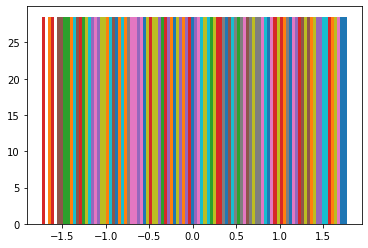

In [60]:
boundaries = get_affine_range(data)
a, _, _ = plt.hist(data, density=True, bins=100, histtype='stepfilled')
ymin, ymax = np.quantile(a[a > 0], [0.25, 0.95])
plt.vlines(x=boundaries, ls='--', colors='purple', ymin=ymin, ymax=ymax)
plt.show()

In [58]:
data = torch.distributions.normal.Normal(0, 0.5).sample((1, 10))
data

tensor([[-0.6976,  0.0045,  0.1539,  0.2485, -0.4440, -0.0589,  0.1708,  0.6126,
          0.2341,  1.1028]])